My first Kaggle kernel.
Referred from: https://www.kaggle.com/omarelgabry/a-journey-through-titanic

In [1]:
# Import Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Data
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("-------------------Training Data Information--------------------")
train.info()
print("-------------------Test Data Information------------------------")
test.info()

-------------------Training Data Information--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
-------------------Test Data Information------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp 

In [4]:
# Removing irrelevant columns
# PassengerID --> irrelevant
# Name --> may categorize it, but I decided to drop
# Ticket --> Irrelevant
# Cabin --> Very few entries
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
test = test.drop(['Name', 'Ticket', 'Cabin'], axis = 1)

list(train.columns.values)

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

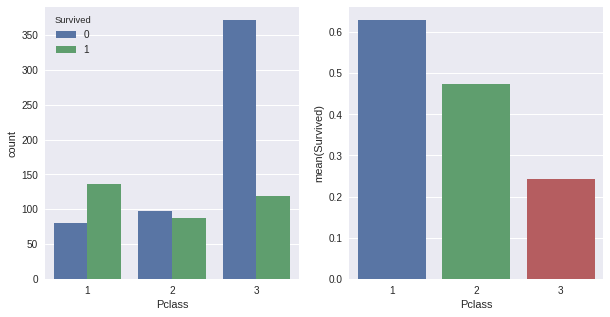

In [5]:
# Analyzing each attribute
# Pclass

fig, (axis1, axis2) = plt.subplots(1, 2, figsize = (10, 5))

# plot1
sns.countplot('Pclass', hue = 'Survived', data = train, ax = axis1)
# plot2
class_per = train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean()
sns.barplot('Pclass', 'Survived', data = class_per, ax = axis2)

# create dummy variables for training data
train_class_dummies = pd.get_dummies(train['Pclass'])
train_class_dummies.columns = ['Upper', 'Middle', 'Lower']
train_class_dummies.drop(['Lower'], axis = 1, inplace = True)

# create dummy variables for test data
test_class_dummies = pd.get_dummies(test['Pclass'])
test_class_dummies.columns = ['Upper', 'Middle', 'Lower']
test_class_dummies.drop(['Lower'], axis = 1, inplace = True)

# drop Pclass column from training and test data
train.drop(['Pclass'], axis = 1, inplace = True)
test.drop(['Pclass'], axis = 1, inplace = True)

# join dummy variables
train = train.join(train_class_dummies)
test = test.join(test_class_dummies)

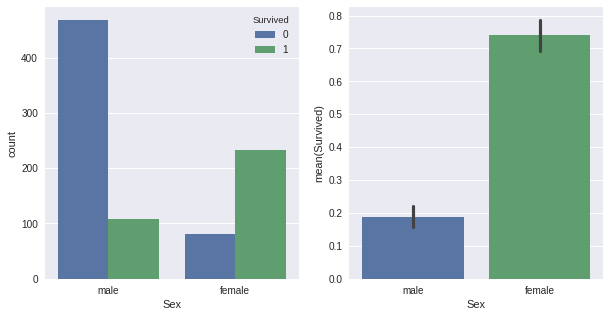

In [6]:
#Sex

fig, (axis1, axis2) = plt.subplots(1, 2, figsize = (10, 5))

# plot1
sns.countplot('Sex', hue = 'Survived', data = train, ax = axis1)
# plot2
sns.barplot('Sex', 'Survived', data = train, ax = axis2)

# create dummy variables for training data
train_sex_dummies = pd.get_dummies(train['Sex'])
train_sex_dummies.drop(['male'], axis = 1, inplace = True)

# create dummy variables for test data
test_sex_dummies = pd.get_dummies(test['Sex'])
test_sex_dummies.drop(['male'], axis = 1, inplace = True)

# drop Sex column from training and test data
train.drop(['Sex'], axis = 1, inplace = True)
test.drop(['Sex'], axis = 1, inplace = True)

# join dummy variables
train = train.join(train_sex_dummies)
test = test.join(test_sex_dummies)

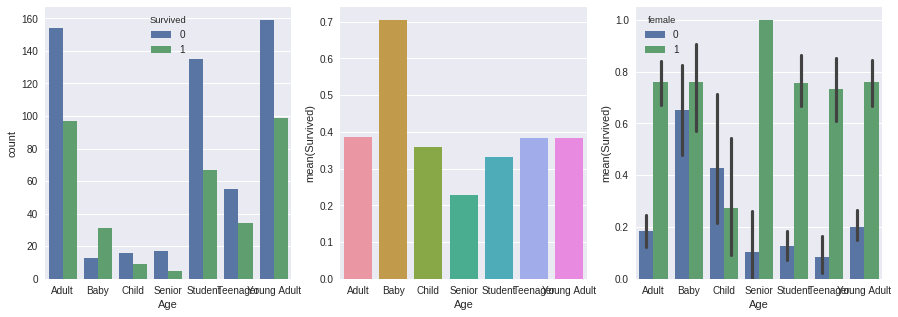

In [7]:
#Age

# mean age of training and test data
train_mean_age = train['Age'].mean()
test_mean_age = test['Age'].mean()

# std age of training and test data
train_std_age = train['Age'].std()
test_std_age = test['Age'].std()

# count of missing values
train_missing_count_age = train['Age'].isnull().sum()
test_missing_count_age = test['Age'].isnull().sum()

# random values for training and test data
train_random_age = np.random.randint(train_mean_age - train_std_age, train_mean_age + train_std_age,
                                    size = train_missing_count_age)
test_random_age = np.random.randint(test_mean_age - test_std_age, test_mean_age + test_std_age,
                                    size = test_missing_count_age)

train.loc[train.Age.isnull(), 'Age'] = train_random_age
test.loc[test.Age.isnull(), 'Age'] = test_random_age

# categorize age column in training data
train['Age'] = train['Age'].astype(int)
bins = (0, 5, 12, 18, 25, 35, 60, 120)
group_names = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['Age'] = pd.cut(train['Age'], bins, labels=group_names, right=True, include_lowest=True)

# catgorize age column in test data
test['Age'] = test['Age'].astype(int)
test['Age'] = pd.cut(test['Age'], bins, labels=group_names, right=True, include_lowest=True)

fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize = (15, 5))

# plot1
sns.countplot('Age', hue = 'Survived', data = train, ax = axis1)
# plot2
class_per = train[['Age', 'Survived']].groupby(['Age'], as_index = False).mean()
sns.barplot('Age', 'Survived', data = class_per, ax = axis2)
# plot3
sns.barplot(x="Age", y="Survived", hue="female", data=train, ax = axis3);

# create dummy variables for training data
train_age_dummies = pd.get_dummies(train['Age'])
train_age_dummies.drop(['Child'], axis = 1, inplace = True)

# create dummy variables for test data
test_age_dummies = pd.get_dummies(test['Age'])
test_age_dummies.drop(['Child'], axis = 1, inplace = True)

# drop Age column from training and test data
train.drop(['Age'], axis = 1, inplace = True)
test.drop(['Age'], axis = 1, inplace = True)

# join dummy variables
train = train.join(train_age_dummies)
test = test.join(test_age_dummies)

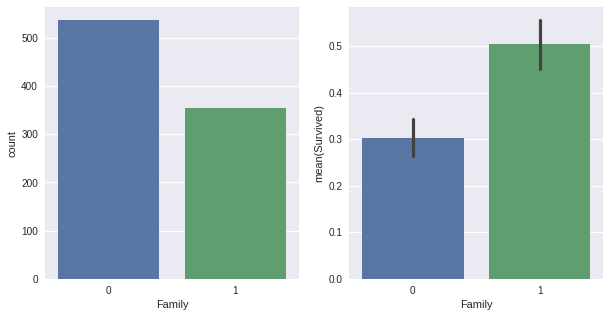

In [8]:
# SibSp and Parch
# replace these columns with a new family column

train['Family'] = train['SibSp'] + train['Parch']
train['Family'].loc[train['Family'] > 0] = 1
train['Family'].loc[train['Family'] == 0] = 0

test['Family'] = test['SibSp'] + test['Parch']
test['Family'].loc[train['Family'] > 0] = 1
test['Family'].loc[train['Family'] == 0] = 0

# drop SibSp and Parch
train = train.drop(['SibSp', 'Parch'], axis = 1)
test = test.drop(['SibSp', 'Parch'], axis = 1)

fig, (axis1, axis2) = plt.subplots(1, 2, figsize = (10, 5))
#plot1
sns.countplot('Family', data = train, ax = axis1)
sns.barplot('Family', 'Survived', data = train, ax = axis2)


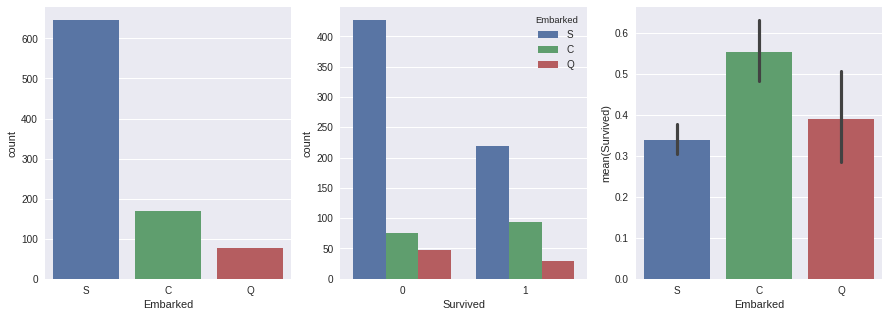

In [9]:
# Embarked

# fill missing values
train['Embarked'] = train['Embarked'].fillna('S')

fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize = (15, 5))
#plot1
sns.countplot('Embarked', data = train, ax = axis1)
#plot2
sns.countplot('Survived', hue = 'Embarked', data = train, ax = axis2)
#plot3
sns.barplot('Embarked', 'Survived', data = train, ax = axis3)

# create dummy variables for training data
train_embark_dummies = pd.get_dummies(train['Embarked'])
train_embark_dummies.drop(['S'], axis = 1, inplace = True)

# create dummy variables for test data
test_embark_dummies = pd.get_dummies(test['Embarked'])
test_embark_dummies.drop(['S'], axis = 1, inplace = True)

# drop Embarked column from training and test data
train.drop(['Embarked'], axis = 1, inplace = True)
test.drop(['Embarked'], axis = 1, inplace = True)

# join dummy variables
train = train.join(train_embark_dummies)
test = test.join(test_embark_dummies)


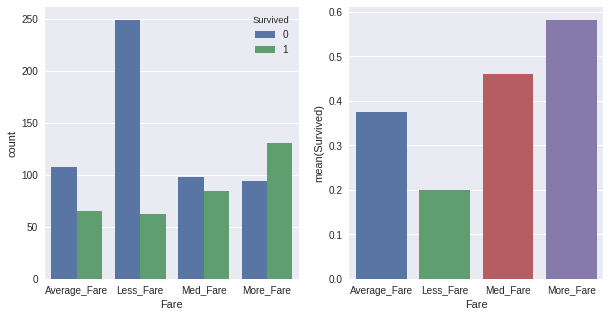

In [10]:
#Fare

# fill missing values
test["Fare"].fillna(test["Fare"].median(), inplace=True)

# catgorize fare column in training data
train['Fare'] = train['Fare'].astype(int)
bins = (0, 8, 15, 30, 1000)
group_names = ['Less_Fare', 'Average_Fare', 'Med_Fare', 'More_Fare']
train['Fare'] = pd.cut(train['Fare'], bins, labels=group_names, right=True, include_lowest=True)

# catgorize fare column in test data
test['Fare'] = test['Fare'].astype(int)
test['Fare'] = pd.cut(test['Fare'], bins, labels=group_names, right=True, include_lowest=True)

fig, (axis1, axis2) = plt.subplots(1, 2, figsize = (10, 5))

# plot1
sns.countplot('Fare', hue = 'Survived', data = train, ax = axis1)
# plot2
fare_per = train[['Fare', 'Survived']].groupby(['Fare'], as_index = False).mean()
sns.barplot('Fare', 'Survived', data = fare_per, ax = axis2)

# create dummy variables for training data
train_fare_dummies = pd.get_dummies(train['Fare'])
train_fare_dummies.drop(['Less_Fare'], axis = 1, inplace = True)

# create dummy variables for test data
test_fare_dummies = pd.get_dummies(test['Fare'])
test_fare_dummies.drop(['Less_Fare'], axis = 1, inplace = True)

# drop Age column from training and test data
train.drop(['Fare'], axis = 1, inplace = True)
test.drop(['Fare'], axis = 1, inplace = True)

# join dummy variables
train = train.join(train_fare_dummies)
test = test.join(test_fare_dummies)


In [11]:
# Create test and train sets

X_train = train.drop(['Survived'], axis = 1)
Y_train = train['Survived']
X_test = test.drop(['PassengerId'], axis = 1).copy()

In [12]:
# K nearest neighbours
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
knn.score(X_train, Y_train)

0.83613916947250277

In [13]:
# Support Vector Machines
from sklearn.svm import SVC, LinearSVC

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
svc.score(X_train, Y_train)

0.78675645342312006

In [14]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
gaussian.score(X_train, Y_train)

0.75084175084175087

In [15]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)

0.87205387205387208

In [16]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
logreg.score(X_train, Y_train)

0.80471380471380471

In [17]:
# get Correlation Coefficient for each feature using Logistic Regression
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])

# preview
coeff_df

,Features,Coefficient Estimate
0,Upper,2.043065
1,Middle,1.126452
2,female,2.550718
3,Adult,-0.635639
4,Baby,1.379367
5,Senior,-1.011185
6,Student,-0.410229
7,Teenager,-0.517448
8,Young Adult,-0.195213
9,Family,-0.091415


In [18]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic.csv', index=False)